# Suspeitas de fraudes em Base de crédito

Usando Mapas auto-organizáveis (SOM), para encontrar possíveis fraudes em uma base de crédito.

## Importação e Pré processamento

In [16]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

In [3]:
base = pd.read_csv("../datasets/credit_data.csv").dropna()

In [6]:
#substituindo datas negativas pela média
base.loc[base.age < 0, 'age'] = base.loc[base.age > 0,'age'].mean()

In [7]:
X = base.iloc[:,0:4].values
y = base.iloc[:, 4].values

In [10]:
normalizador = MinMaxScaler()
X = normalizador.fit_transform(X)

## Construção e treinamento do SOM

In [14]:
som = MiniSom(x=15, y=15, input_len=4, random_seed=0)

In [15]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Resultados e vizualização

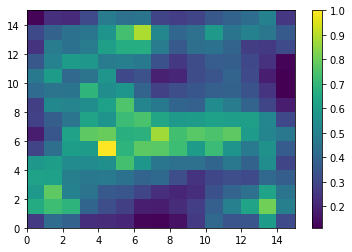

In [18]:
pcolor(som.distance_map().T)
colorbar()

In [19]:
markers = ['o', 's']
colors = ['r', 'g']

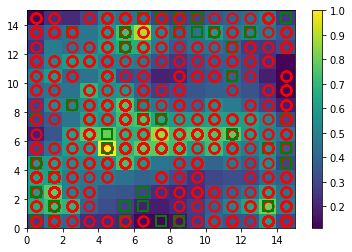

In [21]:
# Bolinha(0)- Tiveram o crédito aprovado
pcolor(som.distance_map().T) #Distância MID - quão parecido um neuronio é de seus vizinhos
colorbar()
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = colors[y[i]], markeredgewidth = 2) #soma 0.5 pra centralizar

## Encontrando registros suspeitos de Fraude

In [22]:
mapeamento = som.win_map(X)

In [29]:
#Concatenar registros com valores de MID muito alta, i.e., pontos diferentes de seus vizinhos
suspeitos = np.concatenate((mapeamento[(5,6)], mapeamento[(14,7)]), axis=0)

In [31]:
suspeitos = normalizador.inverse_transform(suspeitos)

In [33]:
classe = []

for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base.iloc[i,0] == int(round(suspeitos[j,0])):
            classe.append(base.iloc[i,4])
classe = np.asarray(classe)

In [36]:
suspeitos = np.column_stack((suspeitos, classe))

In [39]:
suspeitos = suspeitos[suspeitos[:,4].argsort()]

In [49]:
colunas = [x for x in base.columns[0:4].values]

In [50]:
colunas.append('Classe')

In [52]:
suspeitos_final = pd.DataFrame(suspeitos, columns=colunas)

In [53]:
suspeitos_final

,clientid,income,age,loan,Classe
0,268.0,41174.808126,52.339376,2888.444710,0.0
1,997.0,49104.768240,35.538517,9452.217947,0.0
2,954.0,48083.311545,39.157306,9193.095264,0.0
3,908.0,43388.209473,35.704357,7007.154253,0.0
4,811.0,41702.600771,41.944054,6105.727929,0.0
5,786.0,46038.510655,39.038673,6868.987805,0.0
6,730.0,43538.856115,46.329412,8523.901116,0.0
7,1029.0,39970.211247,40.368115,7867.616836,0.0
8,710.0,47542.802703,40.873338,9448.209721,0.0
9,658.0,43414.487892,44.453363,7170.946724,0.0
